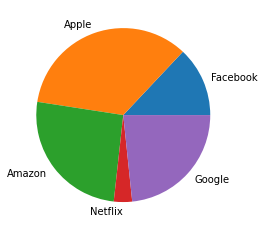

          Date    Open   Close
57  2012-06-01   28.89   31.10
18  2012-07-01   31.25   21.71
30  2012-08-01   21.50   18.06
7   2012-09-01   18.08   21.66
107 2012-10-01   22.08   21.11
..         ...     ...     ...
70  2021-02-01  259.52  257.62
90  2021-03-01  260.82  294.53
9   2021-04-01  298.40  325.08
25  2021-05-01  326.17  319.08
8   2021-05-07  322.38  319.08

[109 rows x 3 columns]


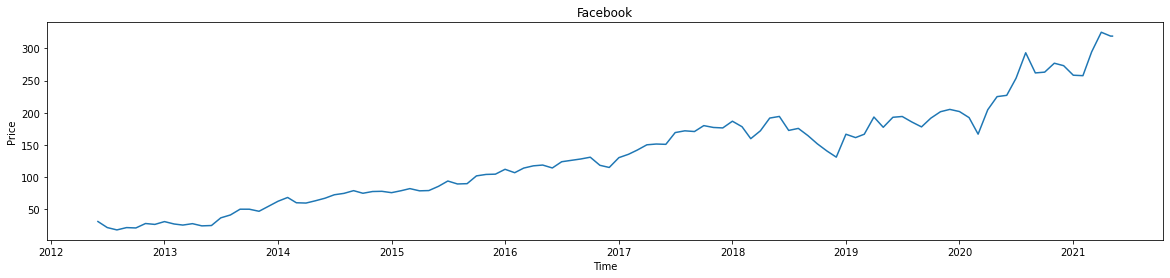

          Date     Open    Close
109 2011-01-01   181.37   169.64
85  2011-02-01   170.52   173.29
181 2011-03-01   173.53   180.13
13  2011-04-01   181.58   195.81
205 2011-05-01   196.57   196.69
..         ...      ...      ...
95  2021-02-01  3242.36  3092.93
191 2021-03-01  3127.89  3094.08
23  2021-04-01  3117.94  3467.42
215 2021-05-01  3484.73  3291.61
216 2021-05-07  3319.09  3291.61

[126 rows x 3 columns]


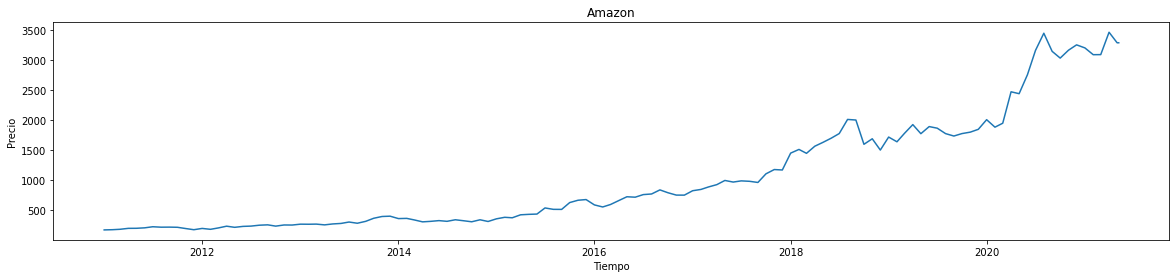

          Date    Open   Close
172 2011-01-01   11.63   12.12
135 2011-02-01   12.19   12.61
281 2011-03-01   12.70   12.45
26  2011-04-01   12.54   12.50
318 2011-05-01   12.49   12.42
..         ...     ...     ...
145 2021-02-01  133.75  121.26
291 2021-03-01  123.75  122.15
36  2021-04-01  123.66  131.46
328 2021-05-01  132.04  130.21
329 2021-05-07  130.85  130.21

[126 rows x 3 columns]


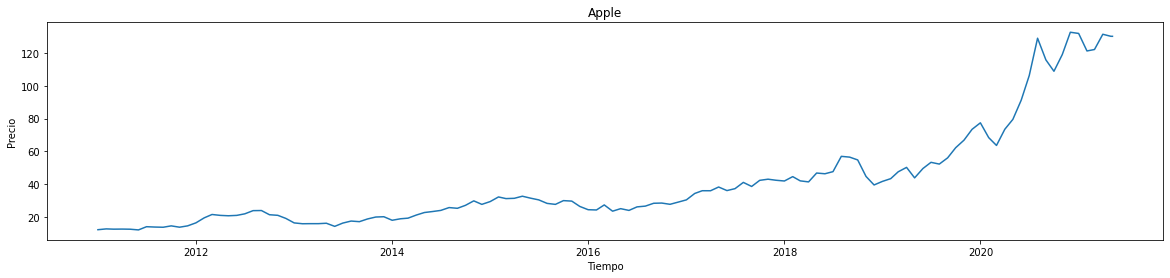

          Date    Open   Close
84  2011-01-01   25.00   30.58
65  2011-02-01   30.66   29.52
141 2011-03-01   29.46   33.97
8   2011-04-01   34.43   33.24
160 2011-05-01   34.03   38.69
..         ...     ...     ...
75  2021-02-01  536.79  538.85
151 2021-03-01  545.57  521.66
18  2021-04-01  529.93  513.47
170 2021-05-01  512.65  503.84
171 2021-05-07  504.62  503.84

[126 rows x 3 columns]


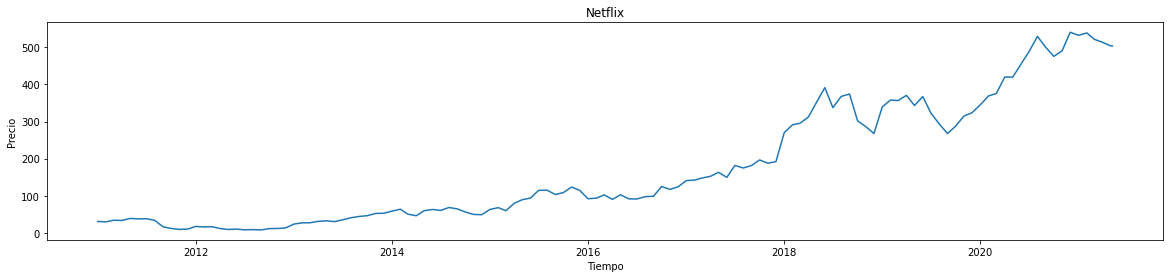

          Date     Open    Close
73  2011-01-01   297.13   299.06
56  2011-02-01   301.12   305.55
122 2011-03-01   307.74   292.28
6   2011-04-01   293.28   271.03
139 2011-05-01   271.83   263.52
..         ...      ...      ...
66  2021-02-01  1853.57  2036.86
132 2021-03-01  2056.52  2068.63
16  2021-04-01  2097.95  2410.12
149 2021-05-01  2402.72  2398.69
150 2021-05-07  2400.00  2398.69

[126 rows x 3 columns]


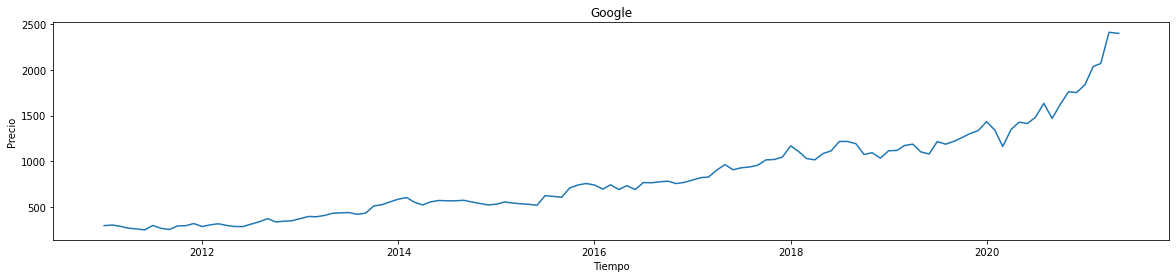

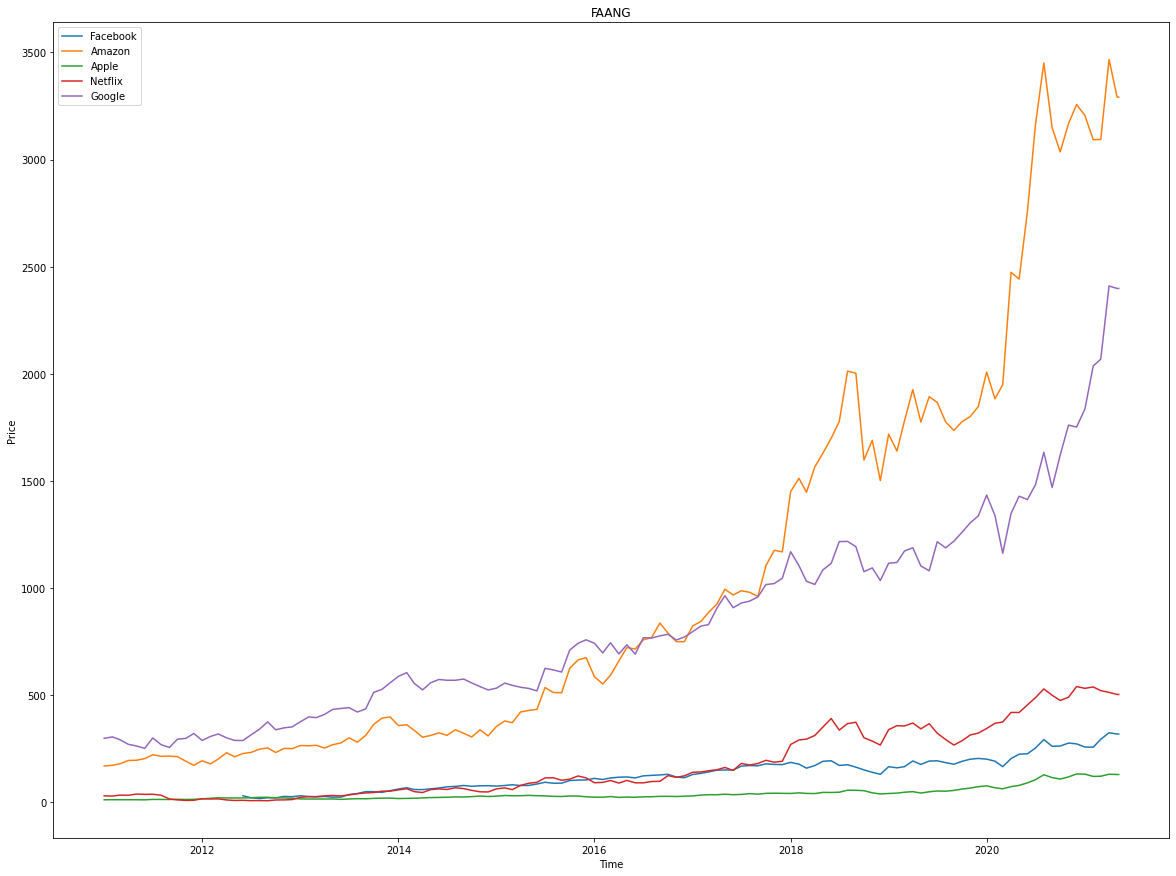

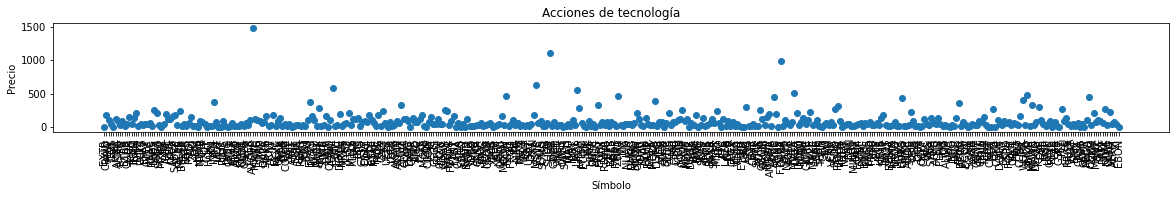

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names = ["Facebook", "Apple", "Amazon", "Netflix", "Google"]
market_cap = [856.555, 2282, 1695, 223.959, 1541]

plt.pie(market_cap, labels = names)
plt.show()

initial = 100
profits2020 = []
profits2021 = []
companies = ["facebook", "amazon", "apple", "netflix", "google"]

facebook_df = pd.read_csv("csv_faang_all/monthly/fb_all_monthly.csv")
amazon_df = pd.read_csv("csv_faang_all/monthly/amzn_all_monthly.csv")
apple_df = pd.read_csv("csv_faang_all/monthly/aapl_all_monthly.csv")
netflix_df = pd.read_csv("csv_faang_all/monthly/nflx_all_monthly.csv")
google_df = pd.read_csv("csv_faang_all/monthly/goog_all_monthly.csv")

def clean(df):
    df = df.astype(str)
    df["Open"] = df["Open"].str.replace(',', '')
    df["Open"] = df["Open"].str.replace(" Dividend", '')
    df["Open"] = df["Open"].str.replace(" Stock Split", '')
    df["Close"] = df["Close"].str.replace(',', '')
    df["Close"] = df["Close"].str.replace("null", '')

    df["Open"] = pd.to_numeric(df["Open"], errors='coerce')
    df["Close"] = pd.to_numeric(df["Close"], errors='coerce')

    del df['web-scraper-order']
    del df['web-scraper-start-url']

    return df

def getClose10(df):
    df['Date'] = pd.to_datetime(df['Date'])
    filtered_df = df.loc[df['Date'] >= '2011-01-01']
    filtered_df = filtered_df.sort_values(by=['Date'])
    return filtered_df

facebook_df = clean(facebook_df)
amazon_df = clean(amazon_df)
google_df = clean(google_df)
netflix_df = clean(netflix_df)
apple_df = clean(apple_df)

facebook_close = getClose10(facebook_df)
amazon_close = getClose10(amazon_df)
google_close = getClose10(google_df)
netflix_close = getClose10(netflix_df)
apple_close = getClose10(apple_df)

print(facebook_close)
f = plt.figure()
f.set_figwidth(20)
plt.title("Facebook")
plt.ylabel("Price")
plt.xlabel("Time")
plt.plot(facebook_close["Date"], facebook_close["Close"])
plt.show()

print(amazon_close)
f = plt.figure()
f.set_figwidth(20)
plt.title("Amazon")
plt.ylabel("Precio")
plt.xlabel("Tiempo")
plt.plot(amazon_close["Date"], amazon_close["Close"])
plt.show()

print(apple_close)
f = plt.figure()
f.set_figwidth(20)
plt.title("Apple")
plt.ylabel("Precio")
plt.xlabel("Tiempo")
plt.plot(apple_close["Date"], apple_close["Close"])
plt.show()

print(netflix_close)
f = plt.figure()
f.set_figwidth(20)
plt.title("Netflix")
plt.ylabel("Precio")
plt.xlabel("Tiempo")
plt.plot(netflix_close["Date"], netflix_close["Close"])
plt.show()

print(google_close)
f = plt.figure()
f.set_figwidth(20)
plt.title("Google")
plt.ylabel("Precio")
plt.xlabel("Tiempo")
plt.plot(google_close["Date"], google_close["Close"])
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.title("FAANG")
plt.ylabel("Price")
plt.xlabel("Time")
plt.plot(facebook_close["Date"], facebook_close["Close"], label = "Facebook")
plt.plot(amazon_close["Date"], amazon_close["Close"], label = "Amazon")
plt.plot(apple_close["Date"], apple_close["Close"], label = "Apple")
plt.plot(netflix_close["Date"], netflix_close["Close"], label = "Netflix")
plt.plot(google_close["Date"], google_close["Close"], label = "Google")
plt.legend()
plt.show()


df = pd.read_csv('csv_technology/stock-ms-technology.csv').astype(str)
df["Price (Intraday)"] = df["Price (Intraday)"].str.replace(",", "")
df["Price (Intraday)"] = pd.to_numeric(df["Price (Intraday)"], errors="coerce")

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(2)
plt.xticks(rotation=90)
plt.title("Acciones de tecnología")
plt.ylabel("Precio")
plt.xlabel("Símbolo")
plt.scatter(df["Symbol"], df["Price (Intraday)"])
plt.show()


